# Описание проекта

## Описание данных

**Файл /datasets/hypothesis.csv:**
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Файл /datasets/orders.csv:**
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**Файл /datasets/visitors.csv:**
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Задача

Есть список гипотез для увеличения выручки, подготовенный вместе с отделом маркетинга. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

# Решение проекта

## Часть 1. Приоритизация гипотез

### 1.1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета. 

In [1]:
import pandas as pd

In [2]:
hp = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hp.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [5]:
hp['ICE'] = (hp['Impact'] * hp['Confidence']) / hp['Efforts']

In [6]:
hp.sort_values(by='ICE', ascending=False).round(2)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


<code style="background:Bisque;color:black">Наиболее приоритетными гипотезами по фреймворку ICE являются гипотезы №8, 0, 7

### 1.2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета. 

In [7]:
hp['RICE'] = (hp['Reach'] * hp['Impact'] * hp['Confidence']) / hp['Efforts']

In [8]:
hp.sort_values(by='RICE', ascending=False).round(2)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


<code style="background:Bisque;color:black">Наиболее приоритетными гипотезами по фреймворку RICE являются гипотезы №7, 2, 0 и 6

### 1.3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

<code style="background:Bisque;color:black">При применении RICE наиболее приоритетная гипотеза изменилась с №8 на №7, так случилось потому что у №7 показатель "Reach" равен 10, в то время как у других гипотез он меньше

##  Часть 2. Анализ A/B-теста

###  2.1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [9]:
orders = pd.read_csv('/datasets/orders.csv')

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
import datetime as dt

In [16]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [17]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Создадим массив уникальных пар значений дат и групп теста

In [18]:
import numpy as np

In [19]:
datesGroup = orders[['date', 'group']].drop_duplicates()

In [20]:
datesGroup.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Агрегируем значения. Вычислим максимальную дату. Посчитаем число уникальных ID заказов, пользователей и сумму выручки

In [21]:
ordersAggregated = (datesGroup
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date']
                                            , orders['group'] == x['group'])]
                          .agg({'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique,
                               'visitorId': pd.Series.nunique, 'revenue': 'sum'}), axis=1)
                    .sort_values(by=['date', 'group']))

In [22]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Аналогично получим агрегированные кумулятивные по дням данные о посетителях

In [23]:
visitorsAggregated = (datesGroup
                     .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                             visitors['group'] == x['group'])]
                           .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1)
                     .sort_values(by=['date', 'group']))

In [24]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим обе таблицы в одной

In [25]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [26]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [27]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [28]:
import matplotlib.pyplot as plt

Создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

In [84]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

In [30]:
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

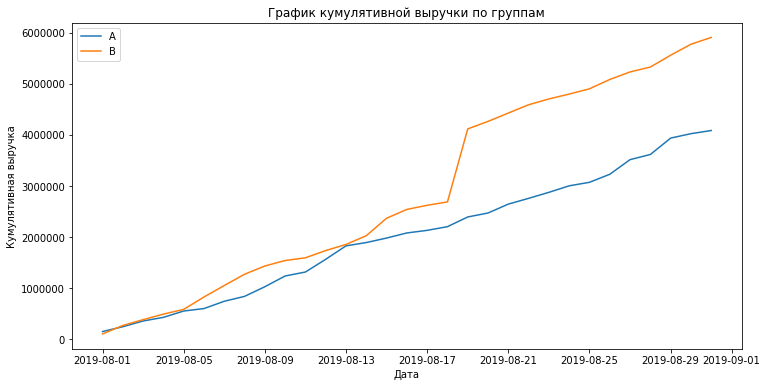

In [85]:
plt.figure(figsize = (12, 6))
plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.show()

<code style="background:Bisque;color:black"> Выручка в обоих группах растет. В начале рост был почти одинаковый, затем группа В начала расти быстрее. Однако, в группе В наблюдается резкий скачок в одной точке, может быть там были какие-то аномальные значения. Группа "А" растет равномерно, медленнее группы "В"

### 2.2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения. 

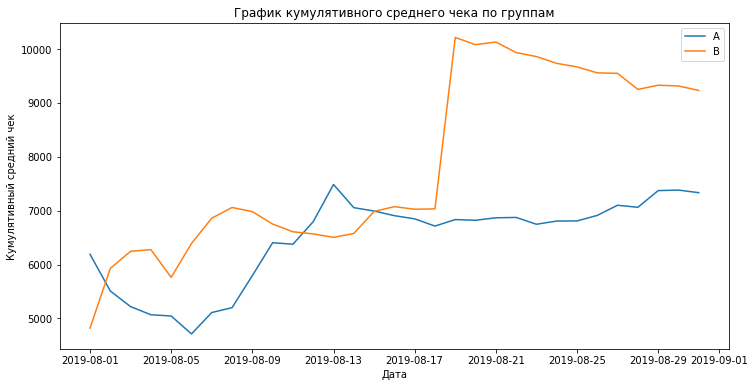

In [32]:
plt.figure(figsize = (12, 6))

plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.show()

<code style="background:Bisque;color:black">Средний чек в группе "В" растет, также наблюдается резкий скачок в одной точке. В группе "А" в начале наблюдается падение, а затем график стремительно растет, начиная с середины теста средний чек становится более менее равномерным

### 2.3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения. 

In [33]:
mergedCumulativeRevenue = (cumulativeRevenueA
                           .merge(cumulativeRevenueB, left_on='date', right_on='date',
                                  how='left', suffixes=['A', 'B']))

In [34]:
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


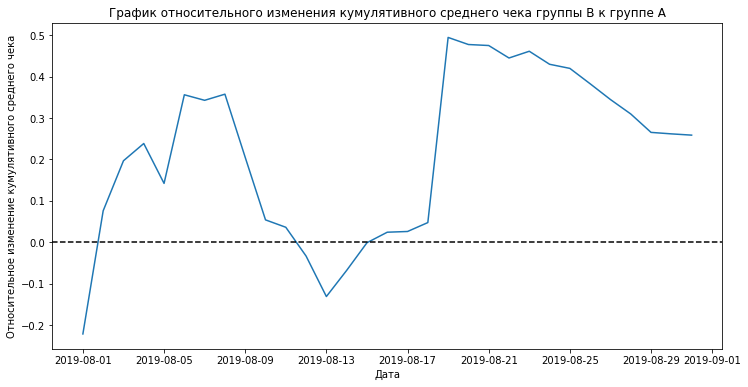

In [35]:
plt.figure(figsize = (12, 6))

(plt.plot
 (mergedCumulativeRevenue['date'], 
  (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
  /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1))

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кумулятивного среднего чека')
plt.show()

<code style="background:Bisque;color:black">Относительное изменение кумулятивного среднего чека группы В к группе А имеет резкие скачки и падения в нескольких точках, скорее всего дело в аномалиях

###  2.4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

Считаем кумулятивную конверсию

In [36]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

Отделяем данные по группам

In [37]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

In [38]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

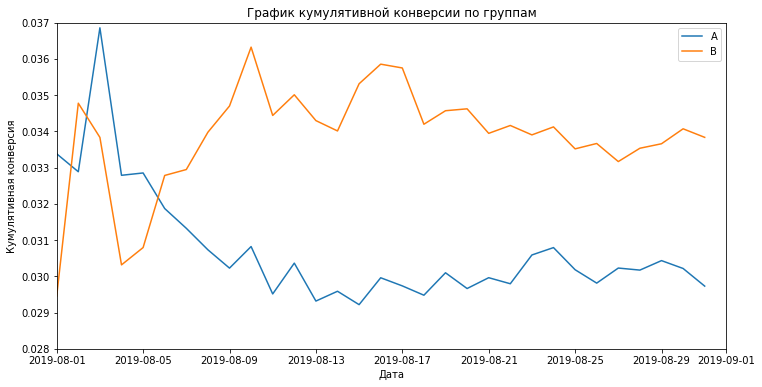

In [39]:
plt.figure(figsize = (12, 6))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')

plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')

plt.axis(["2019-08-01", '2019-09-01', 0.028, 0.037])
plt.show()

<code style="background:Bisque;color:black">Кумулятивная конверсия группы В выше

### 2.5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения. 

In [40]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']],
                            left_on='date', right_on='date', how='left', suffixes=['A', 'B']))

In [41]:
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


In [42]:
mergedCumulativeConversions.describe()

,conversionA,conversionB
count,31.000000,31.000000
mean,0.030728,0.033855
std,0.001595,0.001469
min,0.029217,0.029453
25%,0.029765,0.033595
50%,0.030216,0.034011
75%,0.030806,0.034595
max,0.036856,0.036323


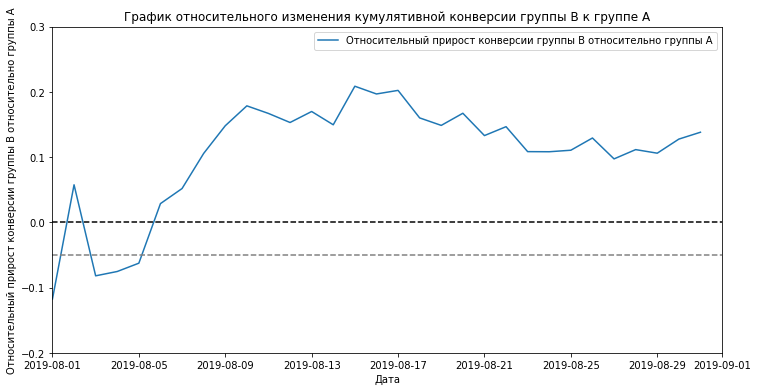

In [43]:
plt.figure(figsize = (12, 6))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительный прирост конверсии группы В относительно группы А')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.05, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.2, 0.3])
plt.show()

<code style="background:Bisque;color:black">В начале теста группа B проигрывала группе A, затем вырвалась вперёд, однако данные надо проверить на аномалии

### 2.6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения. 

In [44]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [45]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1)
                 .groupby('visitorId', as_index=False)
                .agg({'transactionId': pd.Series.nunique}))

In [46]:
ordersByUsers.columns = ['userId','orders']

In [47]:
ordersByUsers.head()

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [48]:
x_values = pd.Series(range(0,len(ordersByUsers)))

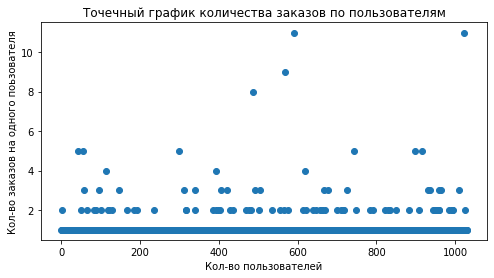

In [49]:
plt.figure(figsize = (8, 4))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Кол-во заказов на одного поьзователя')
plt.xlabel('Кол-во пользователей')
plt.show()

<code style="background:Bisque;color:black">В основном на одного пользователя меньше 2-х заказов. Кроме этого, встречается много пользователей с 2-4 заказами, пока непонятно можно ли считать их аномалиями.

### 2.7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей. 

In [50]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

<code style="background:Bisque;color:black">Не более 5% пользователей оформляли больше чем 2 заказа и не более 1% пользователей оформляли больше, чем 4 заказа.<br>
Выберем 2 заказа на одного пользователя в качестве границы для отсеивания аномальных пользователей, то есть аномальными считаем всё, что больше 2

### 2.8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

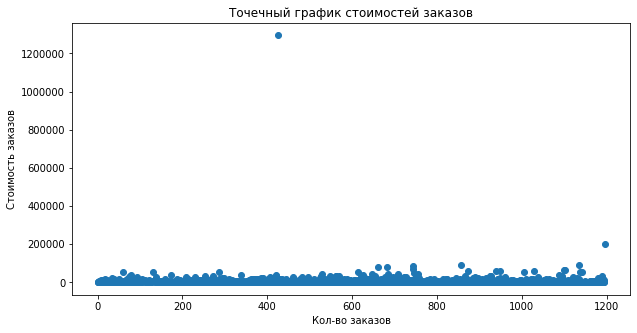

In [51]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize = (10, 5))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Кол-во заказов')
plt.ylabel('Стоимость заказов')
plt.show()

<code style="background:Bisque;color:black">Аномально дорогих заказов не так много

### 2.9.  Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [52]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

<code style="background:Bisque;color:black">Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей.<br>
За границу возьмем 28000руб.

### 2.10.  Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Подготовим данные

In [53]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [54]:
visitorsACummulative = (visitorsADaily
                        .apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                               .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1))
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [55]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [56]:
visitorsBCummulative = (visitorsBDaily
                        .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                        .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1))
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [57]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [58]:
ordersADaily = ((orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']])
                .groupby('date', as_index=False)
                .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [59]:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [60]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [61]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [62]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [63]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные, в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [64]:
ordersByUsersA = (orders[orders['group']=='A']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId' : pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [65]:
ordersByUsersB = (orders[orders['group']=='B']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId' : pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders']
ordersByUsersB.head()

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Создадим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [66]:
sampleA = pd.concat([ordersByUsersA['orders'],\
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),\
                               name='orders')],axis=0)

In [67]:
sampleB = (pd.concat([ordersByUsersB['orders'],
                      pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                name='orders')],axis=0))

H0 - гипотеза: статистически значимых различий в конверсии между группами нет.<br>
H1 - гипотеза: статистически значимые различия в конверсии между группами есть.<br>
alpha = 0.05

In [68]:
import scipy.stats as stats

In [69]:
stats.mannwhitneyu(sampleA, sampleB)[1]

0.008396177528376304

In [70]:
sampleB.mean()/sampleA.mean()-1

0.13807884655320146

<code style="background:Bisque;color:black">Первое число p-value меньше, чем 0.05. Значит, нулевую гипотезу отвергаем, есть значимая разница. Относительный выигрыш группы B равен 13.8% 

### 2.11.  Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Н0 - статистически значимых различий в среднем чеке заказа между группами нет<br>
Н1 - статистически значимые различия в среднем чеке заказа между группами есть<br>
alpha=0.05

In [71]:
(stats.mannwhitneyu
 (orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])

0.3646454927716229

In [72]:
(orders[orders['group']=='B']['revenue'].mean()
 /orders[orders['group']=='A']['revenue'].mean()-1)

0.2587136699126005

<code style="background:Bisque;color:black">P-value значительно больше 0.05. Значит, нулевую гипотезу не отвергаем.

### 2.12.  Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Примем за аномальных пользователей тех, кто сделал более 2 заказов и заплатил за заказ дороже 28000.

In [73]:
usersWithManyOrders = (pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
                                  ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']],
                                 axis = 0))

In [74]:
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

In [75]:
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
                 .drop_duplicates().sort_values())

In [76]:
abnormalUsers.head()

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

In [77]:
abnormalUsers.shape

(74,)

<code style="background:Bisque;color:black">Всего 74 аномальных пользователей

In [78]:
sampleAFiltered = (pd
                   .concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId']
                .isin(abnormalUsers))]['orders'],
                pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                name='orders')],axis=0))

In [79]:
sampleBFiltered = (pd
                   .concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId']
                .isin(abnormalUsers))]['orders'],
                pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                          name='orders')],axis=0))

H0 - гипотеза: статистически значимых различий в конверсии между группами по "очищенным" данным нет.<br>
H1 - гипотеза: статистически значимые различия в конверсии между группами по "очищенным" данным есть.<br>
alpha = 0.05

In [80]:
stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

0.006521296371518379

In [81]:
sampleBFiltered.mean()/sampleAFiltered.mean()-1

0.17270102073526417

<code style="background:Bisque;color:black">Результаты конверсии слегка изменились. P-value с 0.008 стало 0.006, относительный выигрыш группы B с 13% стал 17%. Но p-value по прежнему меньше alpha

### 2.13.  Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Н0 - статистически значимых различий в среднем чеке заказа между группами по "очищенным" данным нет<br>
Н1 - статистически значимые различия в среднем чеке заказа между группами по "очищенным" данным есть<br>
alpha=0.05

In [82]:
stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]

0.3692408756572825

In [83]:
(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
 /orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)

-0.019624288331982598

<code style="background:Bisque;color:black">p-value не изменился, разница между сегментами сильно изменилась с 25% до 1.9% в пользу группы А.

### 2.14.  Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Есть статистически значимое различие по конверсии между группами и по «сырым», и по данным после фильтрации аномалий.
Не отвергли гипотезу о том, что статистически значимого различия по среднему чеку между группами нет.
График различия конверсии между группами сообщает, что результаты группы B лучше группы A.
График различия среднего чека и изменение разницы между сегментами после очищения данных, говорит о том, что аномальное значение в группе В искажало картину и группа А не сильно хуже группы В. Тест можно остановить и сделать вывод, что в группе В покупать стали чаще, но платить больше не стали